## Point 클래스의 메소드(연산자 오버로딩 포함)


- Point 클래스의 메소드(연산자 오버로딩 포함)
- 메소드에는 __init__, __str__, __len__등과 같이 magic method라 불리는 특별한 메소드와 일반 메소드로 구분할 수 있다.
- Magic 메쏘드의 이름은 두 개의 underscore로 메소드 이름을 감싼 형태

- Magic method의 몇 가지 예를 살펴보자.
- Point 객체는 점을 나타내지만 벡터(vector)로 생각할 수도 있다. 그래서 두 점을 더하는 연산을 하려면, 다음과 같은 일반 메소드를 작성하면 된다.
- 각 좌표 값을 더해서 새로운 점을 생성해 리턴한다.


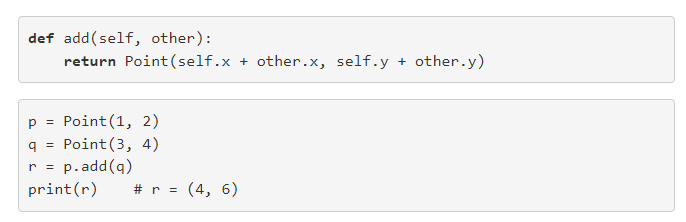

- 그런데 정수, 실수 덧셈처럼 `r=p+q` 형식으로 + 연산자를 사용할 수 있다면 직관적이라 이해하기 쉬운 장점이 있다. 
- 파이썬에서는 이를 위한 magic 메소드를 제공한다.
- 정수, 실수의 덧셈 + 연산자에 Point 클래스의 덧셈 연산을 '덧 입혔다' 라는 의미에서 이러한 기능을 __`연산자 overloading`__ 이라 한다.

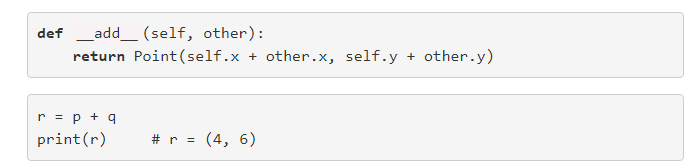

- 특별 메소드의 이름은  **__add__** 이다. r = p+q를 하면, 실제로는 r = p.__add__(q)가 호출되어, 두 벡터의 합 벡터가 리턴되어 r에 저장된다.
- 아래 코드를 참고

In [1]:
class Point:
  def __init__(self, x=0, y=0):
    self.x = x
    self.y = y

  def __str__(self):
    return f"({self.x}, {self.y})"

  def __add__(self, other):
    return Point(self.x + other.x, self.y + other.y)


p = Point(1,2)
q = Point(3,4)
r = p + q
print(r)

s = p.__add__(q)
print(s)

print(r,s)

(4, 6)
(4, 6)
(4, 6) (4, 6)


[산술 연산자 오버로딩 종류]
- `__add__`, `__sub__`, `__mul__`, `__truediv__`, `__floordiv__`, `__mod__` ( 각각 +, -, *, /, //, %)

- `__iadd__`, `__isub__`, `__imul__`, `__itruediv__`, `__ifloordiv__`, `__imode__` (+=, -=, *=, /=, //=, %=)

- 다른 산술 연산자 오버로딩을 위한 매직 메소드도 있음. (파이선 레퍼런스 참고)


[비교 연산자 오버로딩]
- `__lt__`, `__le__`, `__gt__`, `__ge__`, `__eq__`, `__ne__` ( <, <=, >, >=, ==, !=)

- 연산자 오버로딩 기능을 Point 클래스에 적용.
- 뺄셈 연산자 오버로딩을 위해 `__sub__` 메소드 작성
- r = p - q 형식으로 사용하면 되고, 벡터의 뺄셈처럼 대응되는 좌표 값 빼줌


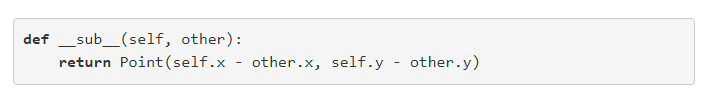

- 곱셈 연산을 생각했을 때, 두 벡터의 곱은 덧셈이나 뺄셈처럼 대응되는 좌표 값을 더하거나 빼는 식으로 정의되지 않음
- 벡터의 곱셈 연산은 r = 3 * p의 형태처럼 p의 좌표 값에 모두 상수 3을 곱하는 식으로 사용됨 
- 즉 scaler * vector 형식
- scaler 값은 Point 객체가 아니기 때문에 연산에 참여하는 두 객체의 타입이 같지 않다는 문제가 발생. 파이썬에서는 이럴 경우 연산자 오버로딩 기능 지원(오른쪽 객체를 기준으로 오버로딩)

- **`__rmul__`** (right multiplication) magic 메쏘드는 * 연산자의 오른쪽에 등장하는 객체가 self가 되고 왼쪽 객체가 other가 되는 형식임. 그래서 이름에 r이 붙었으며, 이 경우 self와 other의 타입이 달라도 됨
> r = 3 * p  # r = p.__rmul(3)의 형식으로 호출됨 [반대 아님]

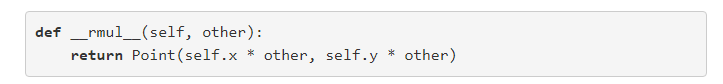

In [3]:
class Point:
  def __init__(self, x=0, y=0):
    self.x = x
    self.y = y

  def __str__(self):
    return f"({self.x}, {self.y})"

  def __add__(self, other):
    return Point(self.x + other.x, self.y+other.y)

  def __sub__(self, other):
    return Point(self.x - other.x, self.y - other.y)

  def __rmul__(self, other):
    return Point(self.x * other, self.y * other)

p = Point(1,2)
q = Point(3,4)
r = p-q
print(r)
r = 3 * p
print(r)

(-2, -2)
(3, 6)


In [4]:
r = p * 3
print(r)

TypeError: ignored